In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16

In [11]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [12]:
train_images = tf.image.resize(train_images[..., tf.newaxis], [32, 32])
test_images = tf.image.resize(test_images[..., tf.newaxis], [32, 32])

In [14]:
train_images = tf.image.grayscale_to_rgb(train_images)
test_images = tf.image.grayscale_to_rgb(test_images)

In [15]:
print(f'Train images shape: {train_images.shape}')
print(f'Test images shape: {test_images.shape}')

Train images shape: (60000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)


In [16]:
base_model = VGG16(input_shape=(32, 32, 3), include_top=False, weights='imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [17]:
base_model.trainable = False

In [18]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 851s 453ms/step - loss: 0.9176 - accuracy: 0.7906 - val_loss: 0.5271 - val_accuracy: 0.8122
Epoch 2/10
1875/1875 [==============================] - 826s 441ms/step - loss: 0.4322 - accuracy: 0.8461 - val_loss: 0.4815 - val_accuracy: 0.8336
Epoch 3/10
1875/1875 [==============================] - 827s 441ms/step - loss: 0.3948 - accuracy: 0.8546 - val_loss: 0.4513 - val_accuracy: 0.8440
Epoch 4/10
1875/1875 [==============================] - 828s 441ms/step - loss: 0.3693 - accuracy: 0.8643 - val_loss: 0.4712 - val_accuracy: 0.8394
Epoch 5/10
1875/1875 [==============================] - 830s 443ms/step - loss: 0.3478 - accuracy: 0.8727 - val_loss: 0.4527 - val_accuracy: 0.8494
Epoch 6/10
1875/1875 [==============================] - 823s 439ms/step - loss: 0.3264 - accuracy: 0.8796 - val_loss: 0.4824 - val_accuracy: 0.8457
Epoch 7/10
1875/1875 [==============================] - 829s 442ms/step - loss: 0.3089 - accuracy: 0.8858 - val_

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 110s - loss: 0.5179 - accuracy: 0.8509 - 110s/epoch - 350ms/step

Test accuracy: 0.8508999943733215


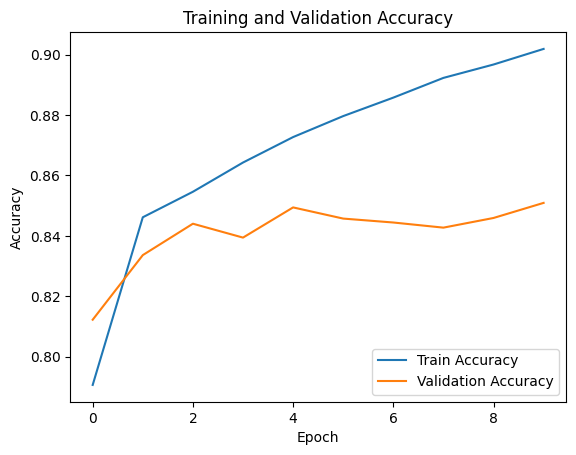

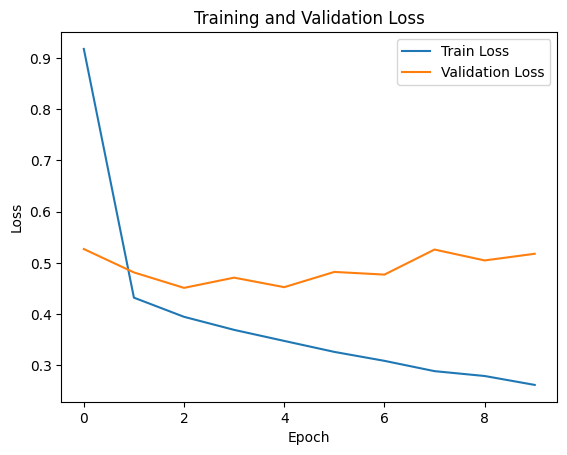

In [22]:
# Графік точності
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Графік втрат
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()